In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

## Análise e Visualização de Dados 

Ao utilizar IA, um dos passos mais importantes é compreender o problema analisando a base de dados utilizada para o mesmo. Através dessa análise, pode-se identificar quais atributos são considerados e o comportamento geral das amostras coletadas. Por exemplo, pode-se identificar a existência de ruído nas amostras, valores incorretos, falta de atributos, assim como a distribuição geral dos dados através da visualização dos mesmos.

Essa análise e visualização corresponde a boa parte do trabalho de um cientista de dados, como pode ser visto na pirâmide abaixo e será o foco dessa atividade.

![alt text](imgs/data_tree.png "Title")

Para isso, em Python, três bibliotecas são comumente utilizadas:
* Pandas: utilizada para manipulação da base de forma geral. Inicialmente a leitura da base é realizada como um dataframe, estrutura do Pandas. Através dela, pode-se realizar a análise dos dados descrita acima.
* Matplot: biblioteca básica para visualização de gráficos como barra, histograma.
* Seaborn: biblioteca implementada baseada no matplot, permitindo também gerar gráficos mais complexos.

### Conhecendo os atributos do dataset

Para leitura da base no Pandas, utiliza-se o comando read_csv, em que o mesmo retornará um dataframe. As informações gerais da base podem ser vistas através do método info() do Pandas (e.g. nome dos atributos e quantidade total de amostras).

In [2]:
df = pd.read_csv('data/Pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
## visualizando os tipos de pokemons existentes através do método unique()
print("Tipo 1:", df['Type 1'].unique())
print("Tipo 2:", df['Type 2'].unique())

Tipo 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Tipo 2: ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


### Visualização - Countplot

Um dos pontos mais importantes é a análise gráfica. É uma forma de conhecer a base. Por exemplo, pode-se identificar através do gráfico abaixo que os pokémons mais frequentes são do tipo water, normal ou grass para o tipo 1, ou flying, ground e poison para o tipo 2. 

Para visualizar mais de um gráfico, pode-se utilizar subplots. Isso é feito através da
definição de subplots. No subplots, pode-se inserir vários gráficos lado a lado na horizontal ou vertical. Isso é definido a partir do nrows e ncols. Ao definir nrows 
igual a 1 e ncols igual a 2, diz-se então que teremos dois gráficos inseridos na mesma linha. O figsize define que a figura tem dimensão 16x9.

Uma forma de visualização frequente é a exibição da quantidade de amostras de acordo com um dado atributo da base (nesse caso type 1 e type 2). Isso pode ser feito no Seaborn utilizando o countplot. O countplot possui dois parâmetros obrigatórios.
* y: o atributo desejado para contar a quantidade de amostras (nesse caso type 1 e type 2)
* data: o dataframe da base de dados.
Adicionalmente, outros atributos podem ser utilizados, [conforme documentação do seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html). Entre elas, temos:
* color: a cor da barra do gráfico, nesse caso "b" corresponde a azul. 
* ax: o eixo do subplot, nesse caso ax[0] deverá inserir o gráfico na primeira posição (esquerda), enquanto ax[1] deverá inserir o gráfico à direita.
* order: ordena o gráfico de acordo com o atributo. 


/home/cflavs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


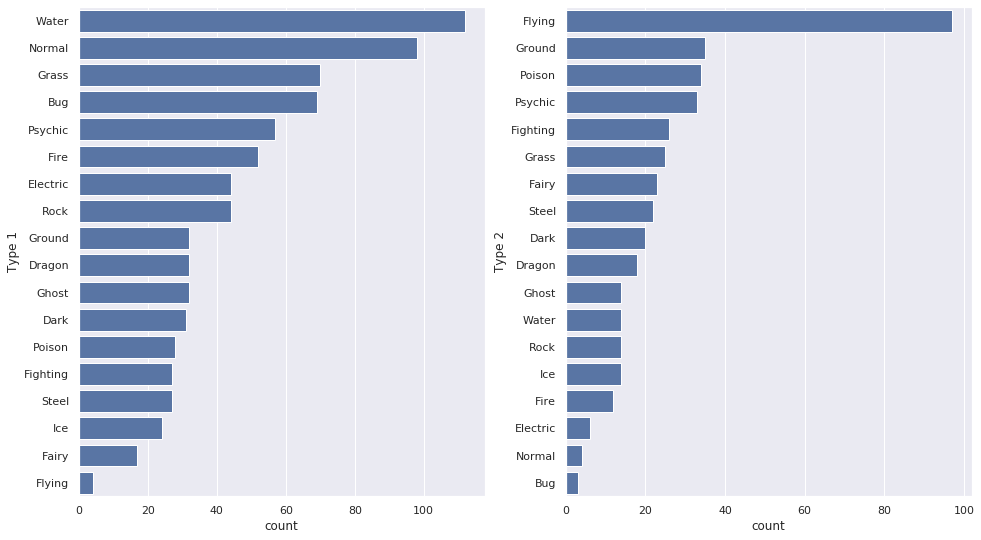

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,9)) 
sns.countplot(y="Type 1", color="b",data=df,ax=ax[0],order = df['Type 1'].value_counts().index)
sns.countplot(y="Type 2", color="b",data=df,ax=ax[1],order = df['Type 2'].value_counts().index)
fig.show()

### Visualização - Heatmaps 

Existem pokémons que possuem os dois tipos. Isso pode ser visto através de um heatmap. Na figura abaixo, por exemplo, percebemos que existem 24 pokémons normais e flying.
Para fazer um heatmap, pode-se utilizar o seaborn, fazendo uma relação entre os dois tipos.
Para fazer isso, inicialmente, pode-se passar o dataframe, tal que sejam consideradas apenas amostras cujo type 2 não esteja vazio (df[df['Type 2']!='None']). 


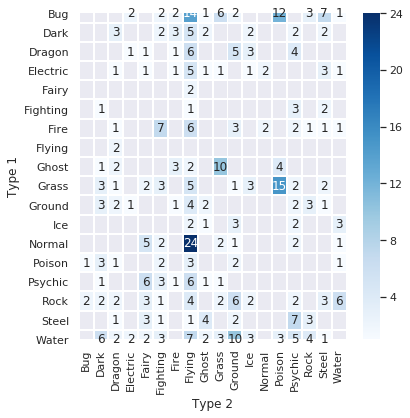

In [153]:
plt.subplots(figsize=(6, 6))
sns.heatmap(
    df[df['Type 2']!='None'].groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)
plt.show()



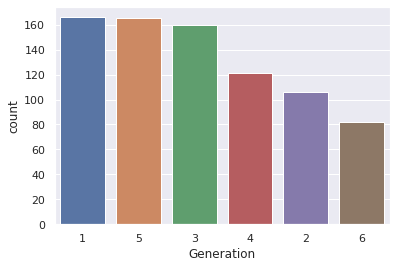

In [11]:
### Plotando a quantidade de pokémons de acordo com a geração 
ax = sns.countplot(x="Generation", data=df,order=df['Generation'].value_counts().index)

### Filtros 

pode-se também criar dataframes a partir do dataframe da base de dados, sendo este correspondente a aplicação de um filtro na base original.
Por exemplo, pode-se criar um dataframe contendo apenas os pokémons que possuem type 1 fire ou electric.
Dado esse dataframe, pode-se gerar um countplot da mesma forma que foi realizado anteriormente

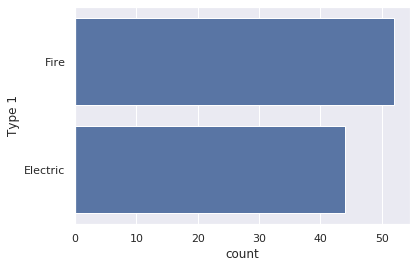

In [107]:
#filtering pokemons using logical operators
df_filter = df[((df['Type 1']=='Fire') | (df['Type 1']=='Electric'))]
sns.countplot(y="Type 1", color="b",data=df_filter)

### Visualização - Histogramas

Histogramas são muito utilizados para visualizar a frequência geral de dados para cada atributo.
Ao analisar o histograma dos atributos da base Pokémon, percebe-se que a maioria dos pokemons possuem, por exemplo, ataque entre 50 e 100. 

In [115]:
df.Legendary.replace({True:1,False:0},inplace=True)

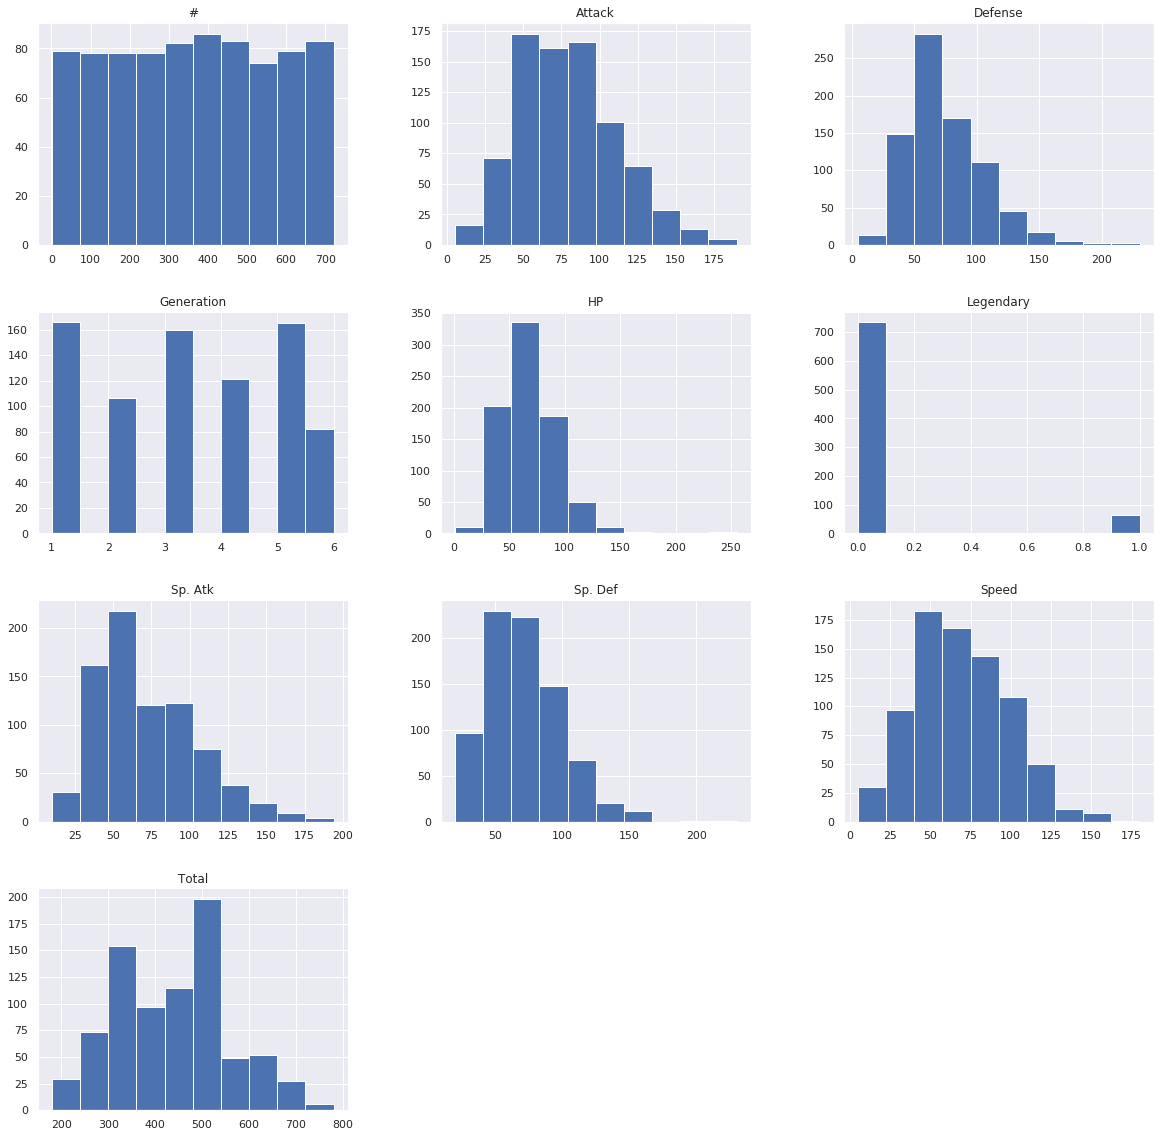

In [118]:
plot = df.hist(figsize = (20,20))

### Visualização - Boxplots

Uma outra forma de visualização pode ser feita através de boxplots. Esse gráfico representa a distribuição de valores para cada atributo e é dado a partir dos fatores: outliers, limites máximo e mínimo, e os quartis (primeiro, segundo e terceiro).

Os outliers são valores discrepantes, podendo estes serem visualizados no boxplot a partir de indicações acima do limite máximo. Os limites representam os maiores e menores valores dos dados considerando o valor mediano deles. E os quartis representam a distribuição geral dos dados.  

Por exemplo, para a base Pokemon, percebe-se que generation e legendary possuem baixa variabilidade, uma vez que seus limites são muito próximos um do outro. Percebe-se também que os stats possuem uma quntidade considerável de outliers.
![alt text](imgs/boxplot2.png "Title")


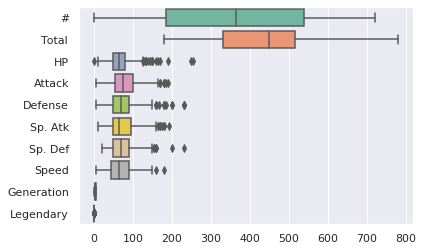

In [14]:
 sns.boxplot(data=df, orient="h", palette="Set2")

In [19]:
df=df.drop(['#'],axis=1) #drop coluna # (axis 1 é a coluna, axis 0 é linha)
df=df.drop(['Total'],axis=1) 

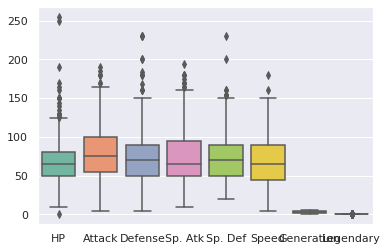

In [20]:
 sns.boxplot(data=df, orient="v", palette="Set2")

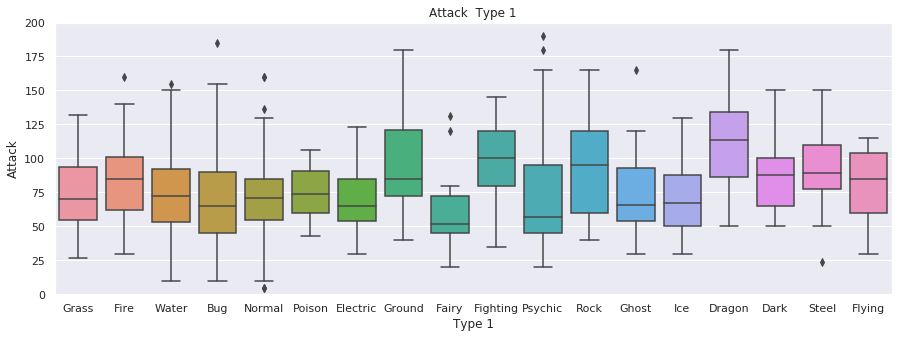

In [21]:
plt.subplots(figsize = (15,5))
plt.title('Attack  Type 1')
sns.boxplot(x = "Type 1", y = "Attack",data = df)
plt.ylim(0,200)
plt.show()



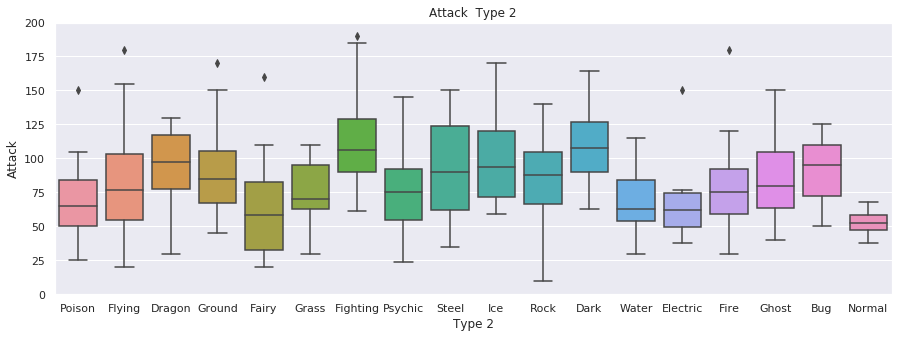

In [22]:
plt.subplots(figsize = (15,5))
plt.title('Attack  Type 2')
sns.boxplot(x = "Type 2", y = "Attack",data = df)
plt.ylim(0,200)
plt.show()

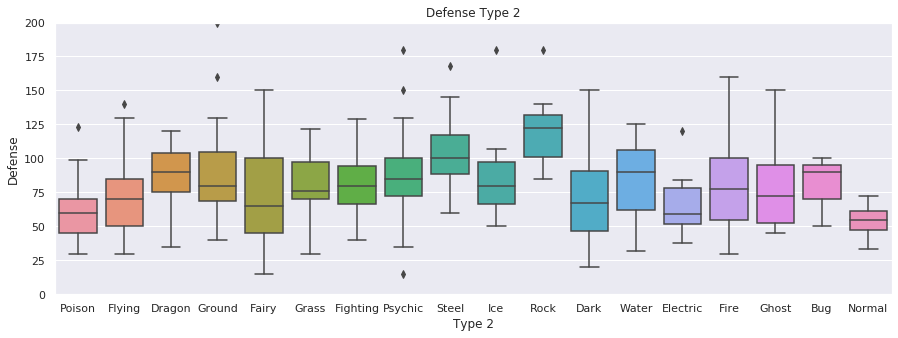

In [23]:
plt.subplots(figsize = (15,5))
plt.title('Defense Type 2')
sns.boxplot(x = "Type 2", y = "Defense",data = df)
plt.ylim(0,200)
plt.show()

Text(0.5, 0.98, 'Pokémons lendários')

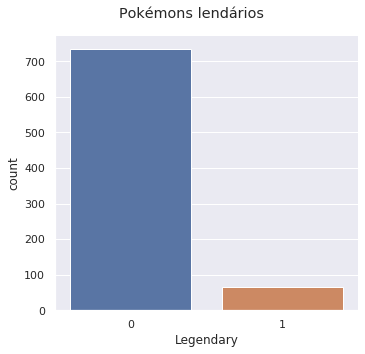

In [149]:
g = sns.catplot(x="Legendary",
                 data=df, kind="count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pokémons lendários')

In [183]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=df.loc[df[df['Name']=="Pikachu"].index.item(),labels].values

In [184]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
stats=np.concatenate((stats,[stats[0]]))  
angles=np.concatenate((angles,[angles[0]]))  

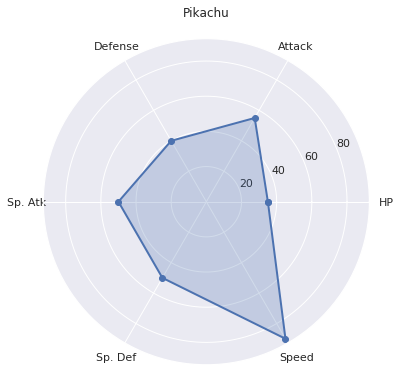

In [185]:
fig=plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)   
ax.plot(angles, stats, 'o-', linewidth=2)  
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels)  
ax.set_title("Pikachu")  
ax.grid(True)